## What types of variables are there in the dataset?
The following types of variables are included in the dataset:
- object (string): gender column
- float64: length column to shell_weight column
- int64: age column

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy.stats.mstats import winsorize

df = pd.read_excel('snail_size.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4177 non-null   object 
 1   length           4163 non-null   float64
 2   diameter         4163 non-null   float64
 3   height           4177 non-null   float64
 4   full_weight      4177 non-null   float64
 5   no_shell_weight  4177 non-null   float64
 6   core_weight      4177 non-null   float64
 7   shell_weight     4147 non-null   float64
 8   age              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [123]:
df.head()

,gender,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,10
4,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## What do their distributions look like?  
- **length**: distribution is left skewed
- **diameter**: distribution is left skewed
- **height**: doesn't have much of a distribution
- **full_weight**: distribution is right skewed
- **no_shell_weight**: distribution is right skewed
- **core_weight**: distribution is right skewed
- **shell_weight**: distribution is right skewed
- **age**: distribution is more right skewed

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'full_weight'}>,
        <AxesSubplot:title={'center':'no_shell_weight'}>,
        <AxesSubplot:title={'center':'core_weight'}>],
       [<AxesSubplot:title={'center':'shell_weight'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

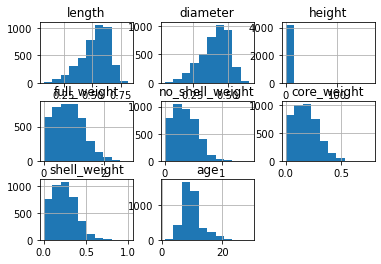

In [124]:
df.hist()

## Do you have missing values (do not fix this)?
Yes, there are missing values. We know based on the pandas command `info()` will reveal to us the number of non-null values, which implicitly tells us which columns contain missing values. In this case, the following columns contain missing values:
- length
- diameter
- shell_weight

The two commands below give us the full picture with regard to missing values.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4177 non-null   object 
 1   length           4163 non-null   float64
 2   diameter         4163 non-null   float64
 3   height           4177 non-null   float64
 4   full_weight      4177 non-null   float64
 5   no_shell_weight  4177 non-null   float64
 6   core_weight      4177 non-null   float64
 7   shell_weight     4147 non-null   float64
 8   age              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [126]:
df[df.isnull().any(axis=1)]

,gender,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,10
42,Infant,0.240,0.175,0.045,0.0700,0.0315,0.0235,NaN,5
81,M,0.620,0.510,0.175,1.6150,0.5105,0.1920,NaN,12
120,F,0.470,0.365,0.105,0.4205,0.1630,0.1035,NaN,9
159,F,0.575,0.460,0.165,1.1240,0.2985,0.1785,NaN,13
198,M,0.560,0.450,0.160,0.9220,0.4320,0.1780,NaN,15
237,Infant,0.130,0.100,0.030,0.0130,0.0045,0.0030,NaN,3
276,F,0.660,0.530,0.185,1.3485,0.4930,0.2450,NaN,12
315,Infant,0.450,0.355,0.110,0.4585,0.1940,0.0670,NaN,8
354,M,0.635,0.515,0.170,1.2750,0.5090,0.2860,NaN,16


## Are there any typos (not just misspellings but other things that just don't seem right)?
The only potential typos would be in the **gender** column given it's a string (object) type. To determine if they're any typos, will display all potential value types then correct them as needed

In [127]:
df['gender'].unique()

array(['M', 'F', 'Infant', 'Instant'], dtype=object)

In [128]:
df['gender'].replace('Instant', 'Infant', regex=True, inplace=True)
df['gender'].unique()

array(['M', 'F', 'Infant'], dtype=object)

## Is there any formatting that causes Python to think a number is a string?
In this case, there are no formatting errors that causes Python to think a number is a string. If so, then the command Pandas `info()` would label the column types as `object` instead of `float64` or `int64`

## Do you observe outliers?
Yes there are outliers for all column values as shown with box plots below. We'll start with length then see the effects of applying log transformations. If log transformations make outliers worst, then we'll try the Winsorize method. Finally, if all fails then it'll be best to leave the data as is rather go with removing rows

### Length Outliers

<AxesSubplot:>

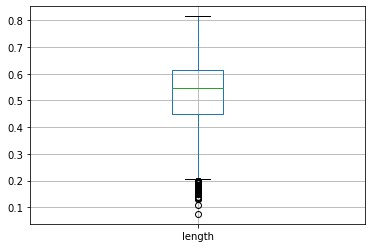

In [129]:
df.boxplot(column=['length'])

Looks like applying cube log creates more outliers rather than reducing it for **length**

<AxesSubplot:>

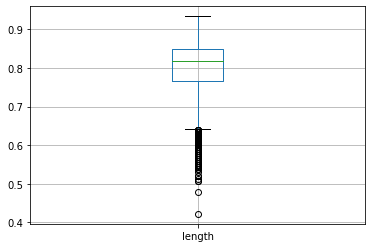

In [130]:
temp_df = df.copy()
temp_df['length'] = temp_df['length'].apply(lambda x: x**(1./3.))
temp_df.boxplot(column=['length'])


Even applying log 10 to length seems to create more outliers. 

<AxesSubplot:>

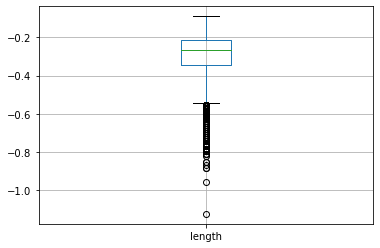

In [131]:
temp_df = df.copy()
temp_df['length'] = temp_df['length'].apply(lambda x: math.log10(x))
temp_df.boxplot(column=['length'])

Winsorize is the clear winner here. We'll go ahead and make the changes permanent.

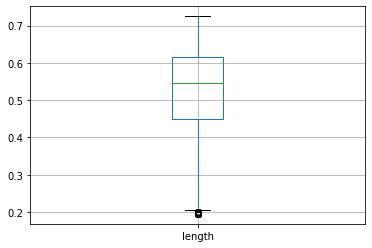

In [132]:
temp_df = df.copy()
temp_df['length'] = winsorize(temp_df['length'], (0.01, 0.02))
temp_df.boxplot(column=['length'])

df['length'] = winsorize(df['length'], (0.01, 0.02))

### Diameter Outliers

**diameter** also appears to have a few outliers. We'll see the effects of log transformation.

<AxesSubplot:>

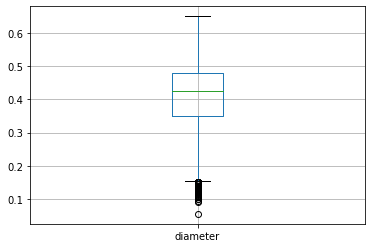

In [133]:
df.boxplot(column=['diameter'])

Applying a log cube transformation appears to make outliers worst for **diameter**

<AxesSubplot:>

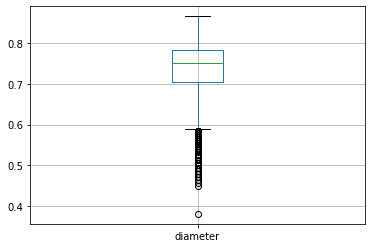

In [134]:
temp_df = df.copy()
temp_df['diameter'] = temp_df['diameter'].apply(lambda x: x**(1./3.))
temp_df.boxplot(column=['diameter'])


Applying a log 10 transformation appears to make outliers worst for **diameter** too. 

<AxesSubplot:>

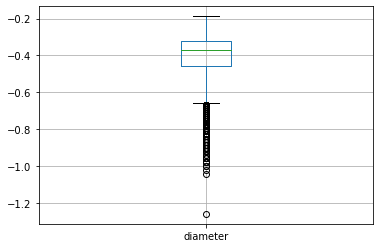

In [135]:
temp_df = df.copy()
temp_df['diameter'] = temp_df['diameter'].apply(lambda x: math.log10(x))
temp_df.boxplot(column=['diameter'])

Now we'll try the Winsorize Method, which will limit outliers with an upper and lower limit rather than remove column values.

Looks like it's more evenly distributed compared to the original and log transformations. So we'll go ahead with making this change permanent.

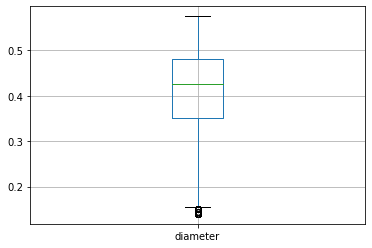

In [136]:
temp_df = df.copy()
temp_df['diameter'] = winsorize(temp_df['diameter'], (0.01, 0.02))
temp_df.boxplot(column=['diameter'])

df['diameter'] = winsorize(df['diameter'], (0.01, 0.02))

### Height Outliers

**height** outliers appear to severely affect the boxplot chart

<AxesSubplot:>

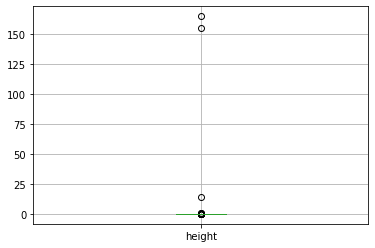

In [137]:
df.boxplot(column=['height'])

Looks like applying log 10 doesn't help with outliers nor distribution for height.

<AxesSubplot:>

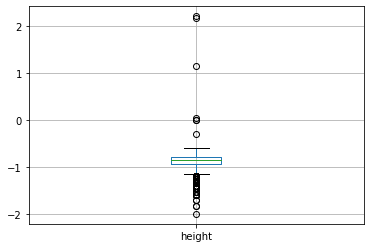

In [138]:
temp_df = df.copy()
temp_df['height'] = temp_df['height'].apply(lambda x: math.log10(x) if x > 0 else 0)
temp_df.boxplot(column=['height'])

Same goes for log cube transformation

<AxesSubplot:>

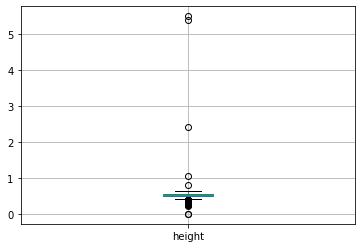

In [139]:
temp_df = df.copy()
temp_df['height'] = temp_df['height'].apply(lambda x: x**(1./3.))
temp_df.boxplot(column=['height'])

With the Winsorize method, height is officially evenly distributed! Let's make those changes permanent.

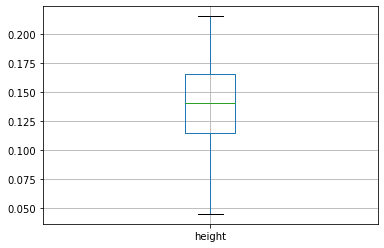

In [140]:
temp_df = df.copy()
temp_df['height'] = winsorize(temp_df['height'], (0.01, 0.02))
temp_df.boxplot(column=['height'])

df['height'] = winsorize(df['height'], (0.01, 0.02))

## Full Weight Outliers

Initial full_weight contains outliers past the maximum value

<AxesSubplot:>

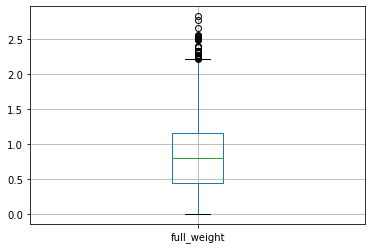

In [141]:
df.boxplot(column=['full_weight'])

Applying a log 10 transformation leads to more outliers below the minimum value.

<AxesSubplot:>

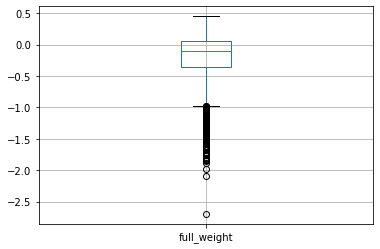

In [142]:
temp_df = df.copy()
temp_df['full_weight'] = temp_df['full_weight'].apply(lambda x: math.log10(x))
temp_df.boxplot(column=['full_weight'])

Applying cubic log transformation leads to more outliers below the minimum value but the distribution is more even. So it's safe to stick with this transformation.

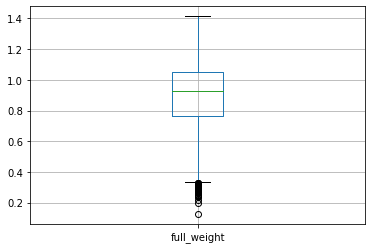

In [143]:
temp_df = df.copy()
temp_df['full_weight'] = temp_df['full_weight'].apply(lambda x: x**(1./3.))
temp_df.boxplot(column=['full_weight'])

df['full_weight'] = df['full_weight'].apply(lambda x: x**(1./3.))

### No Shell Weight Outliers

Here it's clear there are outliers above the maximum value. We'll proceed as we did with previous column values.

<AxesSubplot:>

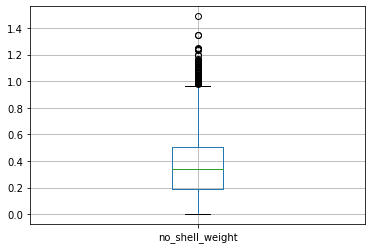

In [144]:
df.boxplot(column=['no_shell_weight'])

Applying log 10 transformation seems to cause more outliers below minimum value.

<AxesSubplot:>

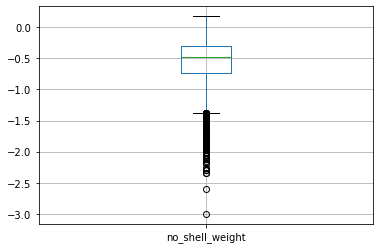

In [145]:
temp_df = df.copy()
temp_df['no_shell_weight'] = temp_df['no_shell_weight'].apply(lambda x: math.log10(x))
temp_df.boxplot(column=['no_shell_weight'])

Applying log cubic transformation leads to a more even distribution - time to make these changes permanent.

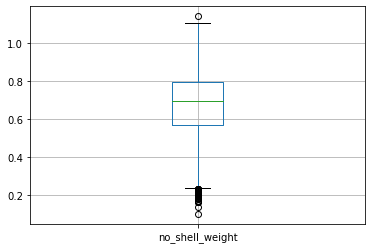

In [146]:
temp_df = df.copy()
temp_df['no_shell_weight'] = temp_df['no_shell_weight'].apply(lambda x: x**(1./3.))
temp_df.boxplot(column=['no_shell_weight'])

df['no_shell_weight'] = df['no_shell_weight'].apply(lambda x: x**(1./3.))

### Core_Weight Outliers
Beginning with a box plot of core_weight, we can see outliers definitely exist. We'll take the same approach as with previous columns.

<AxesSubplot:>

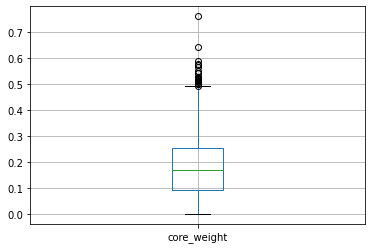

In [147]:
df.boxplot(column=['core_weight'])

Applying log 10 transformation to core_weight makes distribution left skewed.

<AxesSubplot:>

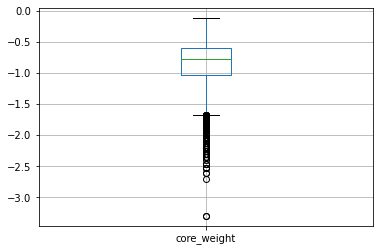

In [148]:
temp_df = df.copy()
temp_df['core_weight'] = temp_df['core_weight'].apply(lambda x: math.log10(x))
temp_df.boxplot(column=['core_weight'])

Applying log cubic transformation leads to an even distribution - time to make changes permanent.

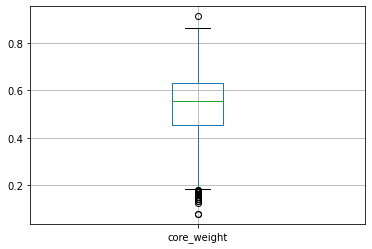

In [149]:
temp_df = df.copy()
temp_df['core_weight'] = temp_df['core_weight'].apply(lambda x: x**(1./3.))
temp_df.boxplot(column=['core_weight'])

df['core_weight'] = df['core_weight'].apply(lambda x: x**(1./3.))

### Shell Weight Outliers
Beginning with a box plot of shell_weight, we can see outliers definitely exist. We'll take the same approach as with previous columns.

<AxesSubplot:>

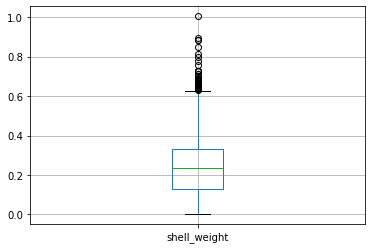

In [150]:
df.boxplot(column=['shell_weight'])

Applying log 10 transformation seems to negatively affect removal of outliers.

<AxesSubplot:>

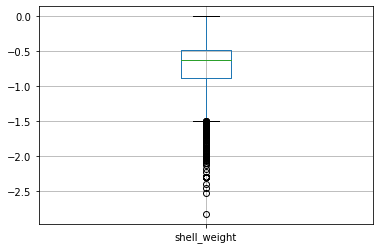

In [151]:
temp_df = df.copy()
temp_df['shell_weight'] = temp_df['shell_weight'].apply(lambda x: math.log10(x))
temp_df.boxplot(column=['shell_weight'])

Applying log cubic transformation makes shell_weight more evenly distributed. Time to make these changes permanent.

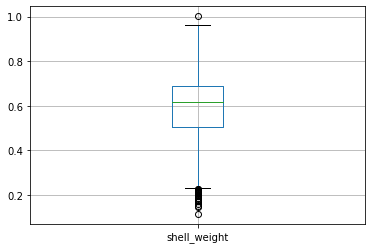

In [152]:
temp_df = df.copy()
temp_df['shell_weight'] = temp_df['shell_weight'].apply(lambda x: x**(1./3.))
temp_df.boxplot(column=['shell_weight'])

df['shell_weight'] = df['shell_weight'].apply(lambda x: x**(1./3.))

### Age Outliers
Beginning with a box plot of age, we can see outliers definitely exist. We'll take the same approach as with previous columns.

<AxesSubplot:>

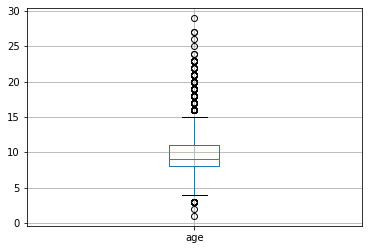

In [153]:
df.boxplot(column=['age'])

Applying a log 10 transformation leads to a better distribution for age, but not necessarily evenly distributed.

<AxesSubplot:>

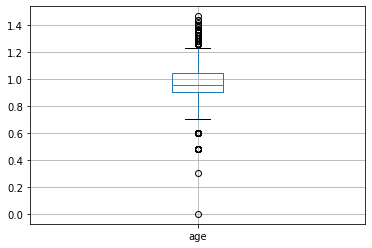

In [154]:
temp_df = df.copy()
temp_df['age'] = temp_df['age'].apply(lambda x: math.log10(x))
temp_df.boxplot(column=['age'])

Applying a log cubic transformation to age gives us the sweet spot. Let's make changes permanent.

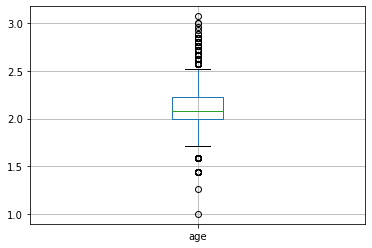

In [155]:
temp_df = df.copy()
temp_df['age'] = temp_df['age'].apply(lambda x: x**(1./3.))
temp_df.boxplot(column=['age'])

df['age'] = df['age'].apply(lambda x: x**(1./3.))

## Are the outliers really outliers, or maybe typos?
Out of all features, the two that were the most bizarre for a snail was **height** and **age**. 

Doing some research online, the average snail lifespan is about 1-10 years and up to 25 years if in captivity. Because of many outliers within age, the data was definitely questionable.

For height, the outliers were perhaps a typo. According to some research online, the average snail height is up to 12 inches. There are some rare snails that can grow up to 3 feet long, but even then the height outliers didn't make any sense and could have been a typo.

## How do the different pairs of features correlate with one other?
Different pairs all seem to positively correlate with one another according to the scatter matrix diagram below. 
Some pairs are more finely positively correlated while other pairs are still positively correlated but a bit more scattered.

array([[<AxesSubplot:xlabel='length', ylabel='length'>,
        <AxesSubplot:xlabel='diameter', ylabel='length'>,
        <AxesSubplot:xlabel='height', ylabel='length'>,
        <AxesSubplot:xlabel='full_weight', ylabel='length'>,
        <AxesSubplot:xlabel='no_shell_weight', ylabel='length'>,
        <AxesSubplot:xlabel='core_weight', ylabel='length'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='length'>,
        <AxesSubplot:xlabel='age', ylabel='length'>],
       [<AxesSubplot:xlabel='length', ylabel='diameter'>,
        <AxesSubplot:xlabel='diameter', ylabel='diameter'>,
        <AxesSubplot:xlabel='height', ylabel='diameter'>,
        <AxesSubplot:xlabel='full_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='no_shell_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='core_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='age', ylabel='diameter'>],
       [<AxesSubplot:xlabel='length', 

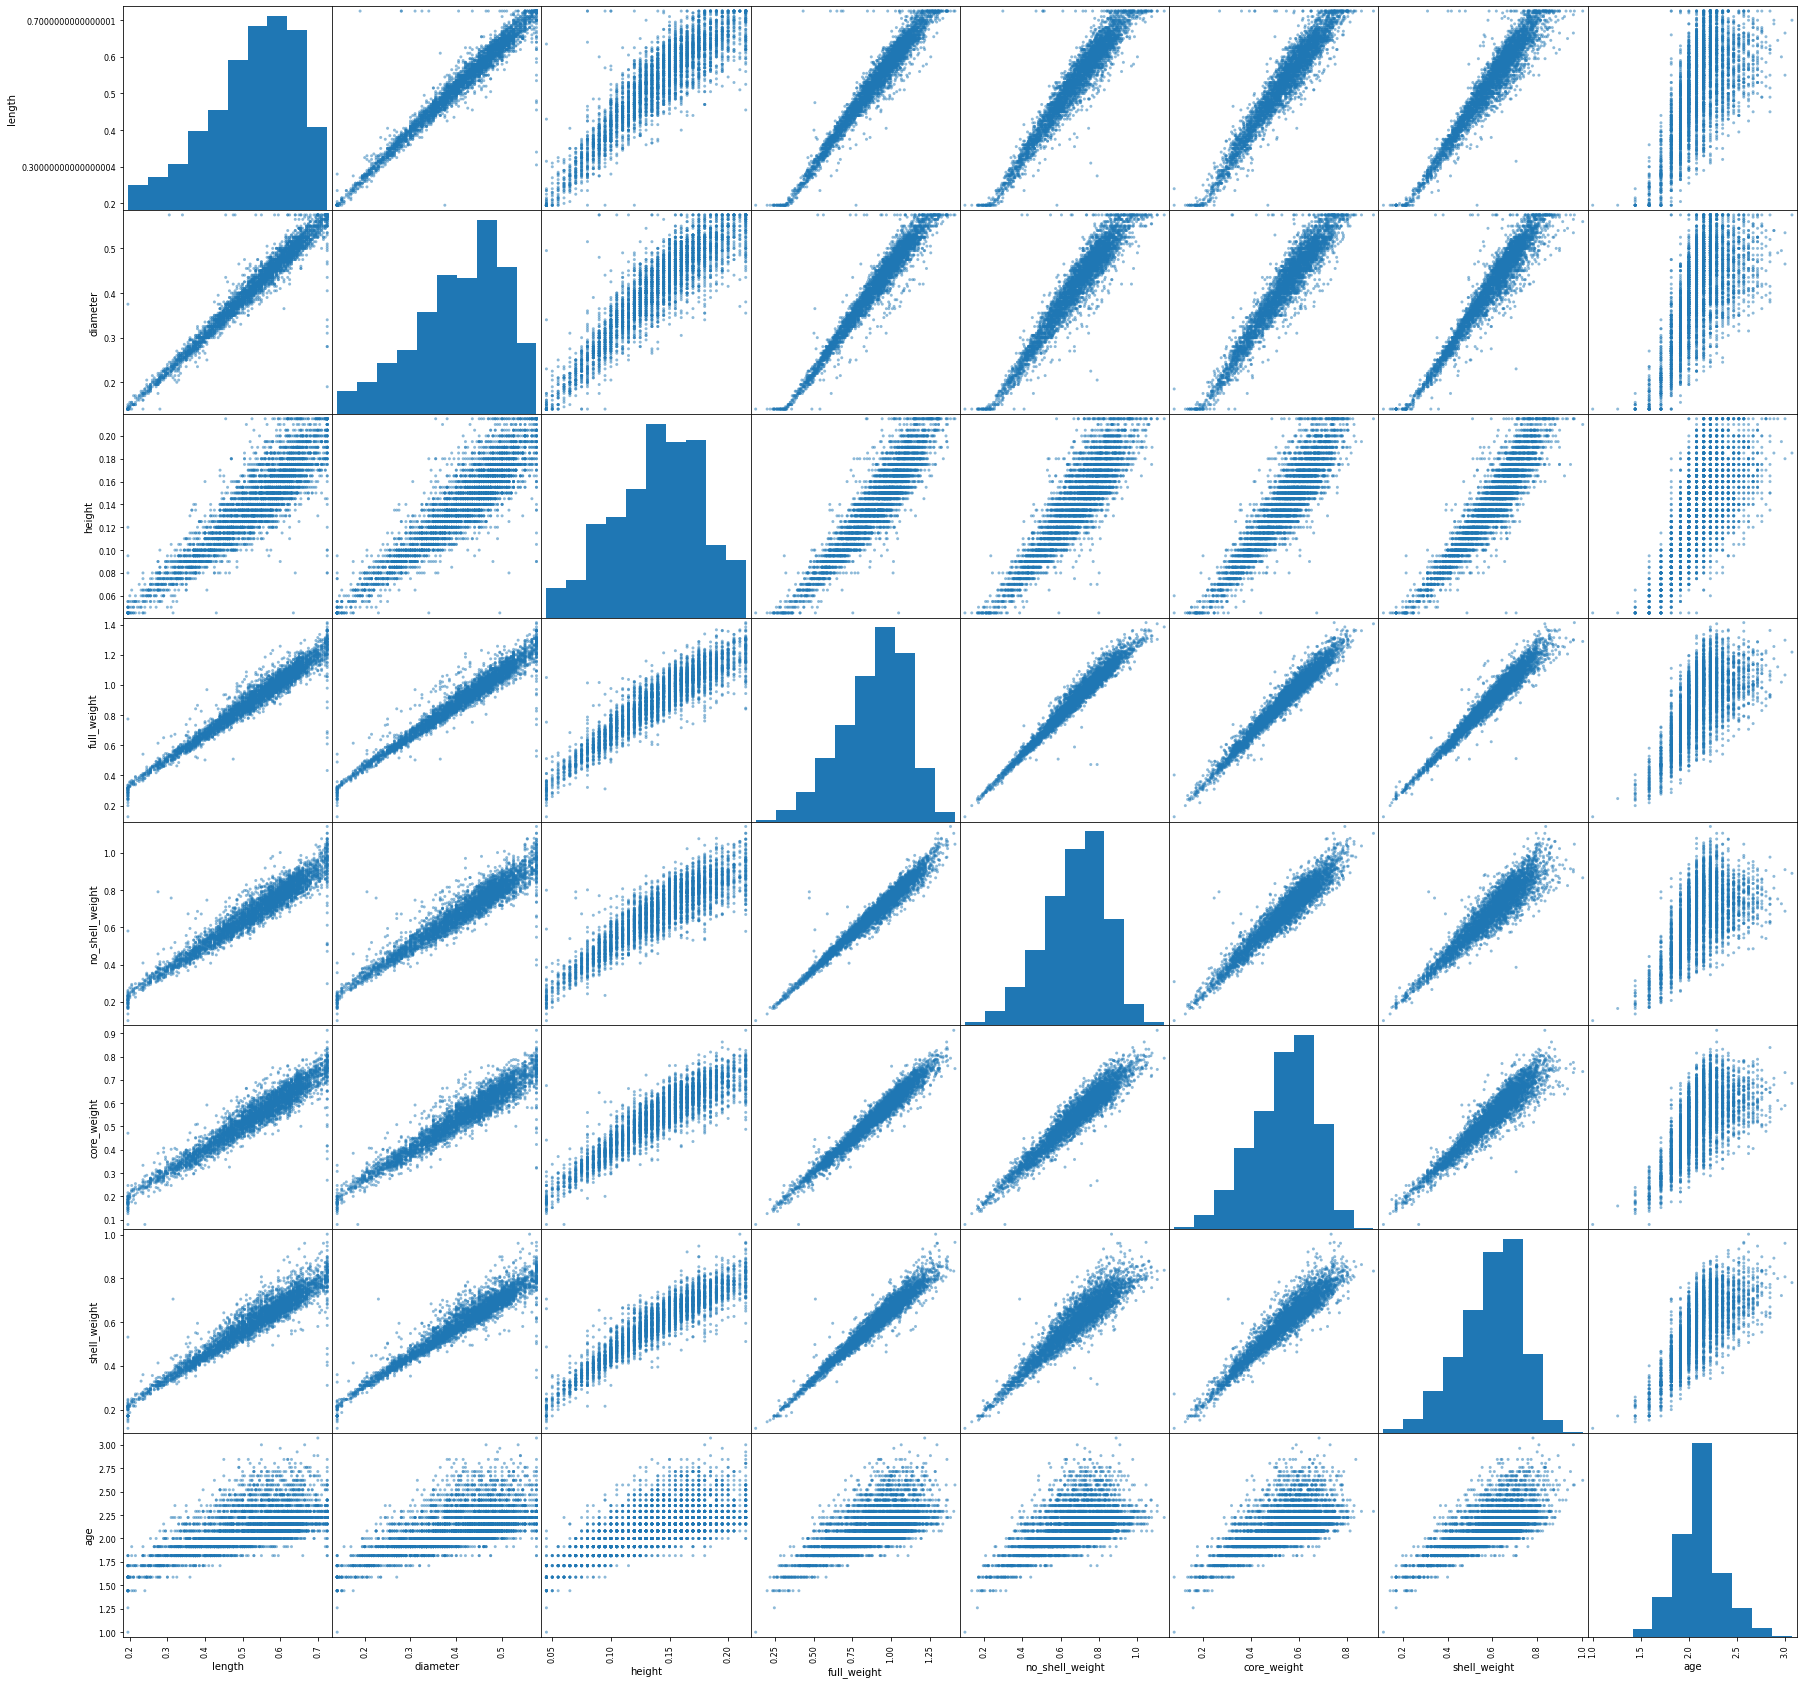

In [156]:
pd.plotting.scatter_matrix(df, figsize=(30, 30))

## Do these correlations make sense?  
Yes they do. As one physical feature of a snail increases, so do their other physical features. And we know generally speaking all physical features tend to increase with age.

## What is the relationship between the features and the target? 
They all have a positive correlation with the exception of age, which has a slight positive correlation.

In [157]:
df.corr()

,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
length,1.000000,0.974295,0.896144,0.971443,0.957073,0.955395,0.953447,0.619744
diameter,0.974295,1.000000,0.902539,0.971245,0.953655,0.952662,0.958413,0.634851
height,0.896144,0.902539,1.000000,0.924227,0.889554,0.910678,0.926367,0.661540
full_weight,0.971443,0.971245,0.924227,1.000000,0.981501,0.979602,0.976054,0.648316
no_shell_weight,0.957073,0.953655,0.889554,0.981501,1.000000,0.957327,0.935247,0.561530
core_weight,0.955395,0.952662,0.910678,0.979602,0.957327,1.000000,0.949974,0.625998
shell_weight,0.953447,0.958413,0.926367,0.976054,0.935247,0.949974,1.000000,0.706556
age,0.619744,0.634851,0.661540,0.648316,0.561530,0.625998,0.706556,1.000000


## Do any features exhibit skew?
Yes as shown via the question `What do their distributions look like?` features all exhibited a skew. All features were transformed because of their outliers and now have a more even distribution as shown below.

However, even after transforming **length** and **diameter** they're still slightly left-skewed

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'full_weight'}>,
        <AxesSubplot:title={'center':'no_shell_weight'}>,
        <AxesSubplot:title={'center':'core_weight'}>],
       [<AxesSubplot:title={'center':'shell_weight'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

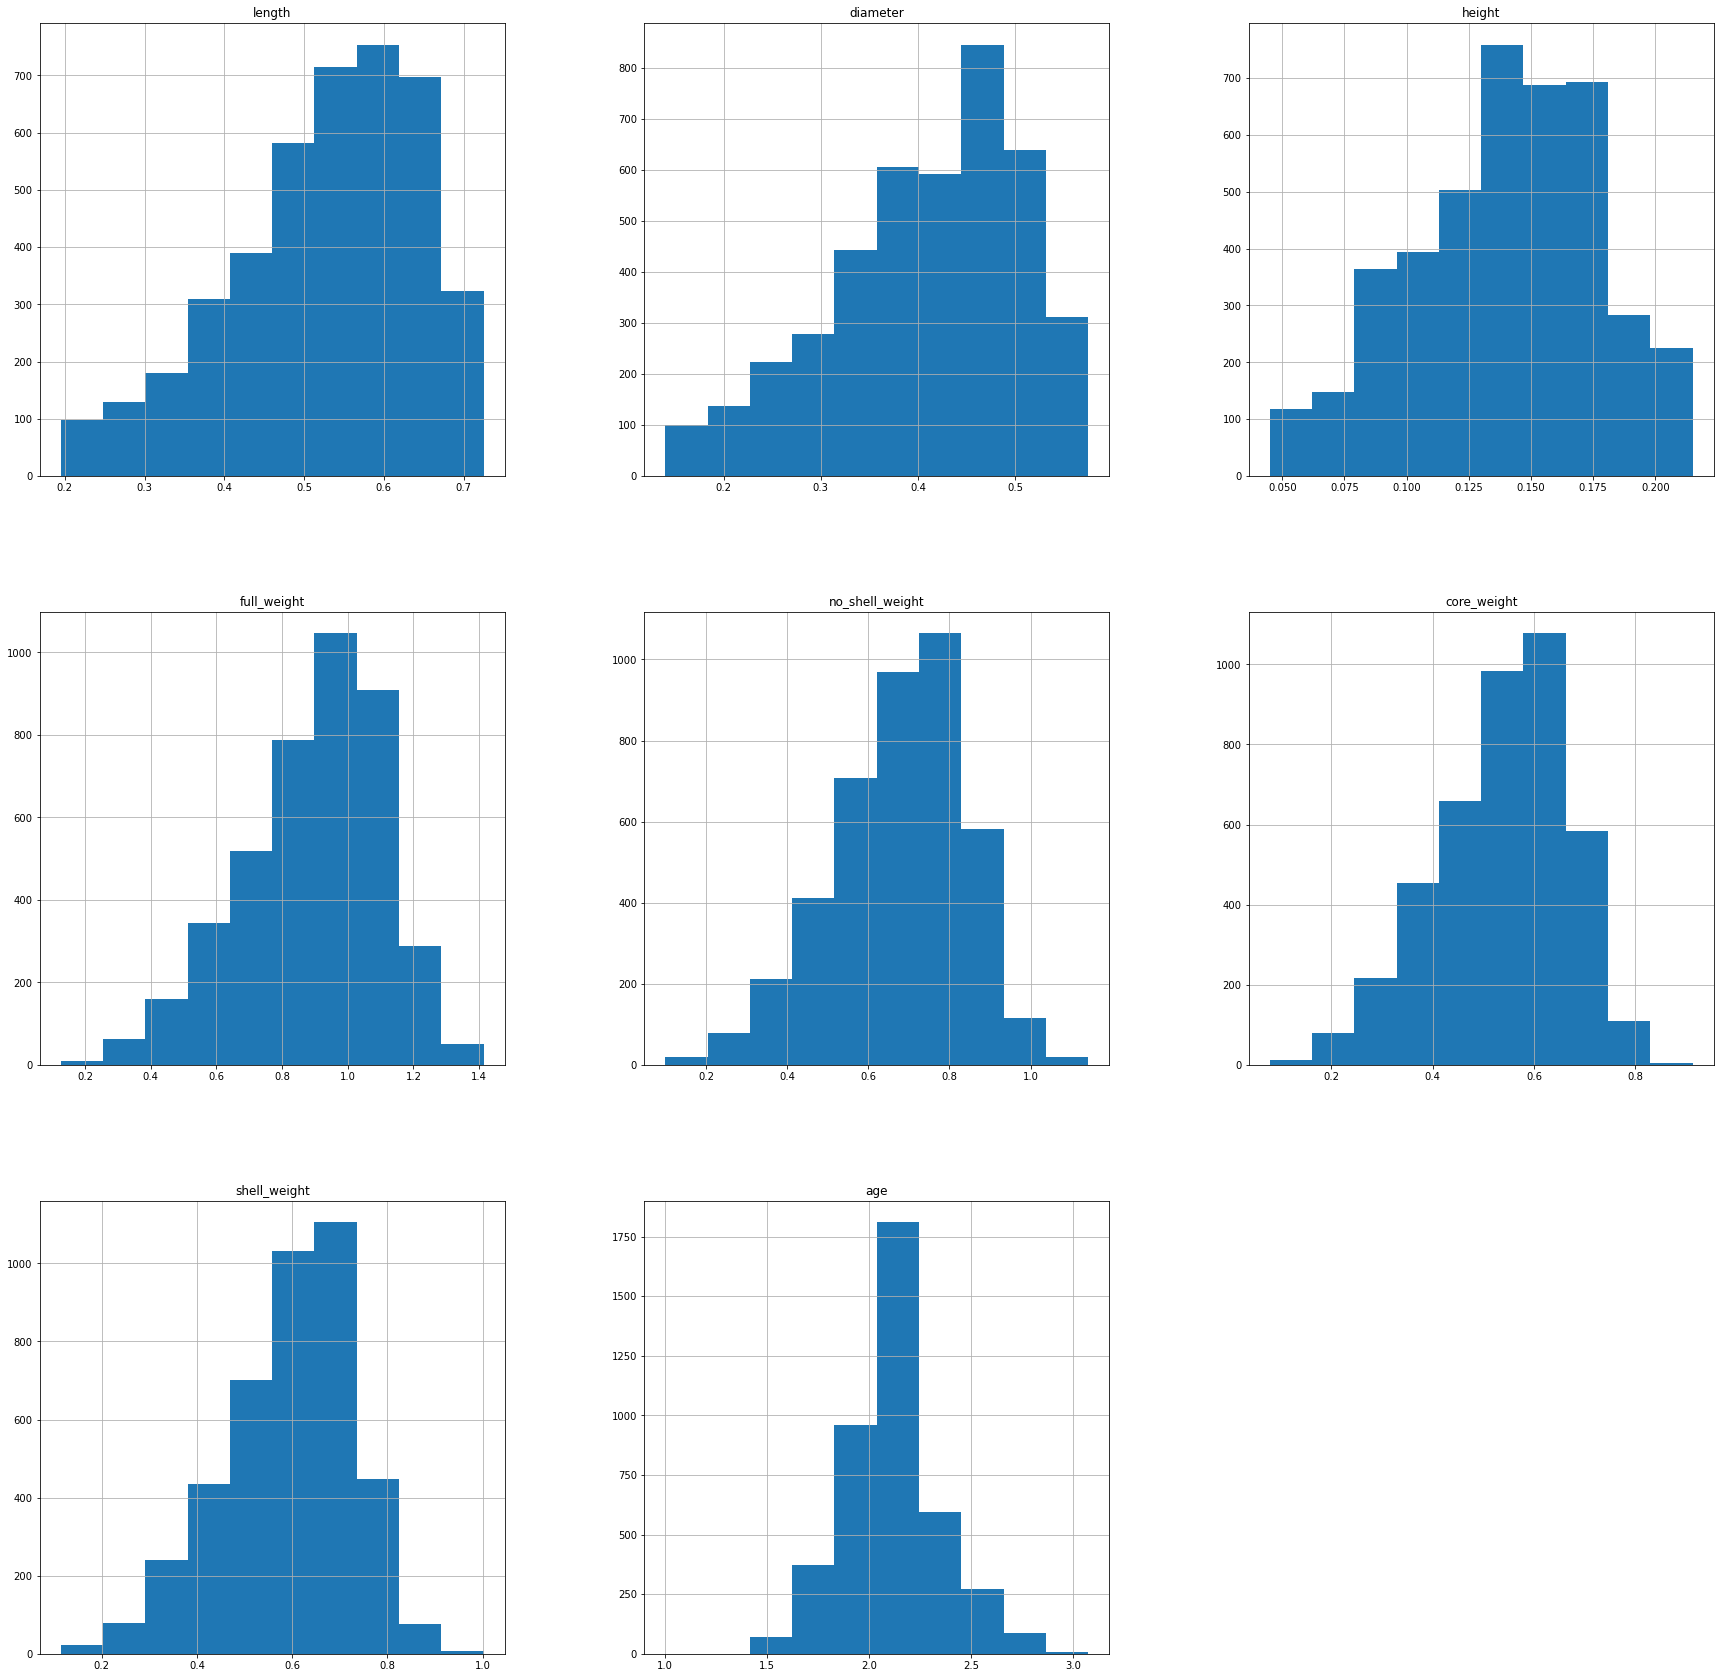

In [158]:
df.hist(figsize=(30,30))

## What do you know now that will inform the modeling strategy? 
- All features have a strong positive correlation with one another with the exception of age which has a general positive correlation
- All features have an evenly distributed skew with the exception of **length** and **diameter** features
- There were outliers, which were all addressed using one of the following methods: 1) log 10 transformtion, 2) log cubic transformation, 3) Winsorize method